# Project7 – Product review analytics using text classification
## Custom Stopwords
## Actionable insights from N Gram

In [1]:
import pandas as pd

review = pd.read_csv('reviews1.csv')
review.head()

,Review_class,review_text
0,Positive,This sound track was beautiful! It paints the ...
1,Positive,I'm reading a lot of reviews saying that this ...
2,Positive,This soundtrack is my favorite music of all ti...
3,Positive,I truly like this soundtrack and I enjoy video...
4,Positive,"If you've played the game, you know how divine..."


In [2]:
review.shape

(20000, 2)

# EDA

In [3]:
review.isnull().sum()

Review_class    0
review_text     0
dtype: int64

In [4]:
review.dropna(inplace=True)

In [5]:
review['Review_class'].value_counts()

Positive    10257
Negative     9743
Name: Review_class, dtype: int64

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 2 columns):
Review_class    20000 non-null object
review_text     20000 non-null object
dtypes: object(2)
memory usage: 468.8+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

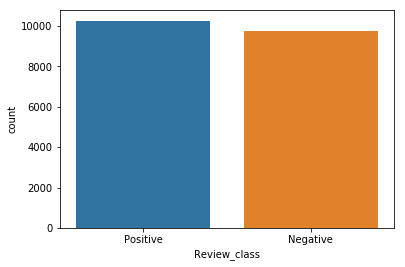

In [8]:
sns.countplot(review['Review_class'])
plt.show()

### Word cloud of positive reviews

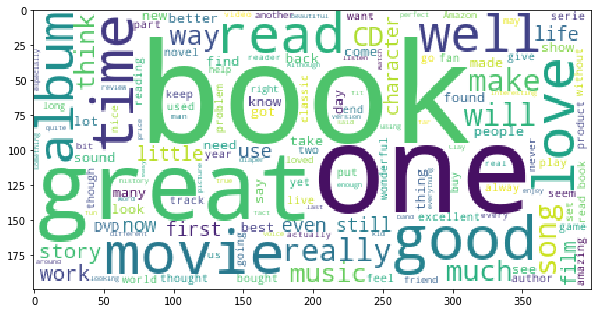

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(background_color='WHITE').generate(' '.join(review[review['Review_class']=='Positive']['review_text']))
plt.figure(figsize=(10,6))
plt.imshow(wc)

### Word cloud of negative reviews

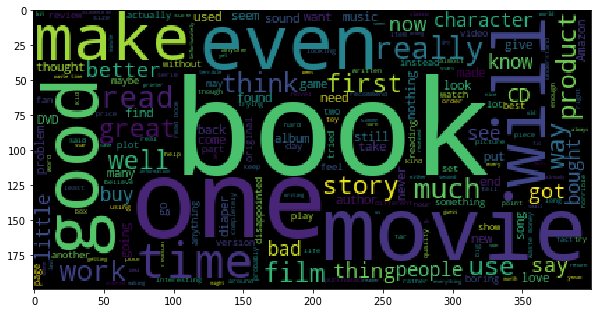

In [10]:
wc = WordCloud(background_color='BLACK').generate(' '.join(review[review['Review_class']=='Negative']['review_text']))
plt.figure(figsize=(10,6))
plt.imshow(wc)

## Custom Stopwords

In [11]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

In [12]:
token = word_tokenize(''.join(review['review_text']))                         

In [13]:
c = Counter(token)

In [14]:
c["n't"]

9591

In [15]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [16]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
stopwords_token = word_tokenize(' '.join(stopwords))
stopwords_count = Counter(stopwords_token)

In [18]:
stopwords_count

Counter({'i': 1,
         'me': 1,
         'my': 1,
         'myself': 1,
         'we': 1,
         'our': 1,
         'ours': 1,
         'ourselves': 1,
         'you': 5,
         "'re": 1,
         "'ve": 2,
         "'ll": 2,
         "'d": 1,
         'your': 1,
         'yours': 1,
         'yourself': 1,
         'yourselves': 1,
         'he': 1,
         'him': 1,
         'his': 1,
         'himself': 1,
         'she': 2,
         "'s": 2,
         'her': 1,
         'hers': 1,
         'herself': 1,
         'it': 2,
         'its': 1,
         'itself': 1,
         'they': 1,
         'them': 1,
         'their': 1,
         'theirs': 1,
         'themselves': 1,
         'what': 1,
         'which': 1,
         'who': 1,
         'whom': 1,
         'this': 1,
         'that': 2,
         'these': 1,
         'those': 1,
         'am': 1,
         'is': 2,
         'are': 2,
         'was': 2,
         'were': 2,
         'be': 1,
         'been': 1,
         'being': 

#### remove "not" and "n't" from the stopwords list

In [19]:
stopwords_count.pop("n't")
stopwords_count.pop("not")

1

#### form a list of new custom stop words using the keys 

In [20]:
stopwords_count.keys()

dict_keys(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "'re", "'ve", "'ll", "'d", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "'s", 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 

In [21]:
custom_stop_words_new = list(stopwords_count.keys())

In [22]:
custom_stop_words_new

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "'re",
 "'ve",
 "'ll",
 "'d",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "'s",
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other

# Document Term Matrix

In [23]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

review['Review_class']=review.Review_class.map({'Positive':1, 'Negative':0})

review.head()

,Review_class,review_text
0,1,This sound track was beautiful! It paints the ...
1,1,I'm reading a lot of reviews saying that this ...
2,1,This soundtrack is my favorite music of all ti...
3,1,I truly like this soundtrack and I enjoy video...
4,1,"If you've played the game, you know how divine..."


In [24]:
review.Review_class.value_counts()

1    10257
0     9743
Name: Review_class, dtype: int64

### TEXT CLEANING

In [25]:
docs=review['review_text'].str.lower()
docs=review['review_text'].str.replace('[^a-z ]','')
stemmer = nltk.stem.SnowballStemmer('english')

In [26]:
def clean_sentence(text):
    words = text.split(' ')
    clean_words = [stemmer.stem(word) for word in words if word not in custom_stop_words_new]
    return ' '.join(clean_words)


review['clean_txt'] = docs.apply(clean_sentence)
review.head()

,Review_class,review_text,clean_txt
0,1,This sound track was beautiful! It paints the ...,sound track beauti paint seneri mind well rec...
1,1,I'm reading a lot of reviews saying that this ...,read lot review say best game soundtrack figu...
2,1,This soundtrack is my favorite music of all ti...,soundtrack favorit music time hand intens sad ...
3,1,I truly like this soundtrack and I enjoy video...,truli like soundtrack enjoy video game music...
4,1,"If you've played the game, you know how divine...",f youv play game know divin music singl song t...


## Count Vectoriser

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

train, validate = train_test_split(review['clean_txt'], test_size=0.3, random_state=100)

vectorizer = CountVectorizer(min_df=50)
vectorizer.fit(train)

train_dtm = vectorizer.transform(train)
validate_dtm = vectorizer.transform(validate)

In [28]:
train_x = train_dtm
validate_x = validate_dtm

train_y = review.loc[train.index]['Review_class']
validate_y = review.loc[validate.index]['Review_class']

## Model Selection

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [30]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_x , train_y)
pred_dt = model_dt.predict(validate_x)
accuracy_dt = accuracy_score(validate_y,pred_dt)
recall_dt = recall_score(validate_y,pred_dt)
precision_dt = precision_score(validate_y,pred_dt)


model_rf = RandomForestClassifier()
model_rf.fit(train_x , train_y)
pred_rf = model_rf.predict(validate_x)
accuracy_rf = accuracy_score(validate_y,pred_rf)
recall_rf = recall_score(validate_y,pred_rf)
precision_rf = precision_score(validate_y,pred_rf)

model_nb = MultinomialNB()
model_nb.fit(train_x , train_y)
pred_nb = model_nb.predict(validate_x)
accuracy_nb = accuracy_score(validate_y,pred_nb)
recall_nb = recall_score(validate_y,pred_nb)
precision_nb = precision_score(validate_y,pred_nb)

model_lg = LogisticRegression()
model_lg.fit(train_x , train_y)
pred_lg = model_lg.predict(validate_x)
accuracy_lg = accuracy_score(validate_y,pred_lg)
recall_lg = recall_score(validate_y,pred_lg)
precision_lg = precision_score(validate_y,pred_lg)

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
result = pd.DataFrame({'Method':['Decision Trees','Random Forest','Multinomial Naive Bayes','Logistic Regression'],
                       'Accuracy':[accuracy_dt,accuracy_rf,accuracy_nb,accuracy_lg],
                       'Recall Score':[recall_dt,recall_rf,recall_nb,recall_lg],
                      'Precision Score':[precision_dt,precision_rf,precision_nb,precision_lg]})
result

,Method,Accuracy,Recall Score,Precision Score
0,Decision Trees,0.686667,0.703896,0.691327
1,Random Forest,0.751500,0.717857,0.780445
2,Multinomial Naive Bayes,0.802333,0.814286,0.803331
3,Logistic Regression,0.816333,0.833117,0.813570


In [32]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [33]:
bagg = BaggingClassifier()

bagmodel = bagg.fit(train_x,train_y)

pred_bag = bagmodel.predict(validate_x)

accuracy_bag = accuracy_score(validate_y,pred_bag)
recall_bag = recall_score(validate_y,pred_bag)
precision_bag = precision_score(validate_y,pred_bag)

In [34]:
ada = AdaBoostClassifier()

ada.fit(train_x,train_y)

pred_ada = ada.predict(validate_x)

accuracy_ada = accuracy_score(validate_y,pred_ada)
recall_ada = recall_score(validate_y,pred_ada)
precision_ada = precision_score(validate_y,pred_ada)

In [35]:
gb = GradientBoostingClassifier()

gb.fit(train_x,train_y)

pred_gb = gb.predict(validate_x)

accuracy_gb = accuracy_score(validate_y,pred_gb)
recall_gb = recall_score(validate_y,pred_gb)
precision_gb = precision_score(validate_y,pred_gb)

In [36]:
result_2 = pd.DataFrame({'Method':['Bagging','Adaboost','Gradient boosting'],
                       'Accuracy':[accuracy_bag,accuracy_ada,accuracy_gb],
                       'Recall Score':[recall_bag,recall_ada,recall_gb],
                      'Precision Score':[precision_bag,precision_ada,precision_gb]})
result_2

,Method,Accuracy,Recall Score,Precision Score
0,Bagging,0.738833,0.721429,0.758103
1,Adaboost,0.757667,0.823052,0.736063
2,Gradient boosting,0.756833,0.822403,0.735269


In [37]:
result_df = pd.concat([result,result_2])

In [38]:
result_df

,Method,Accuracy,Recall Score,Precision Score
0,Decision Trees,0.686667,0.703896,0.691327
1,Random Forest,0.751500,0.717857,0.780445
2,Multinomial Naive Bayes,0.802333,0.814286,0.803331
3,Logistic Regression,0.816333,0.833117,0.813570
0,Bagging,0.738833,0.721429,0.758103
1,Adaboost,0.757667,0.823052,0.736063
2,Gradient boosting,0.756833,0.822403,0.735269


## The models that we choose for furthur hyper parameter modelling are Multinomial Naive Bayes, Logistic Regression and Gradient Boosting.

## Hyper-Parameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# finding parameters for gradient boost 

boost_param = {
    "n_estimators" : [25,50,100],
    "learning_rate" : [1,2],
    "loss" : [ 'deviance', 'exponential'],
    "random_state" : [123]
}

In [41]:
grid_boost = GridSearchCV(gb,boost_param,cv=5)

grid_boost.fit(train_x,train_y)

grid_boost.best_params_

{'learning_rate': 1,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': 123}

In [42]:
tuned_gb = GradientBoostingClassifier( learning_rate =1,
 loss = 'exponential',
 n_estimators = 100,
 random_state = 123)

tuned_gb.fit(train_x,train_y)

pred_gb = tuned_gb.predict(validate_x)

accuracy_gb = accuracy_score(validate_y,pred_gb)
recall_gb = recall_score(validate_y,pred_gb)
precision_gb = precision_score(validate_y,pred_gb)

#### accuracy improves for gb from 0.754 to 0.797 

## Voting Classifier

In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
vote = VotingClassifier([('Logistic Reg',model_lg),('Multinomial NB',model_nb),('Grad Boosting Tuned',tuned_gb)],voting='hard')
vote.fit(train_x,train_y)
pred_vote = vote.predict(validate_x)
accuracy_vote = accuracy_score(validate_y,pred_vote)
recall_vote = recall_score(validate_y,pred_vote)
precision_vote = precision_score(validate_y,pred_vote)

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
result_3 = pd.DataFrame({'Method':['Tuned Gradient boosting','Vote of LG, MNB and GB'],
                       'Accuracy':[accuracy_gb,accuracy_vote],
                       'Recall Score':[recall_gb,recall_vote],
                      'Precision Score':[precision_gb,precision_vote]})

result_df = pd.concat([result_df,result_3])
result_df

,Method,Accuracy,Recall Score,Precision Score
0,Decision Trees,0.686667,0.703896,0.691327
1,Random Forest,0.751500,0.717857,0.780445
2,Multinomial Naive Bayes,0.802333,0.814286,0.803331
3,Logistic Regression,0.816333,0.833117,0.813570
0,Bagging,0.738833,0.721429,0.758103
1,Adaboost,0.757667,0.823052,0.736063
2,Gradient boosting,0.756833,0.822403,0.735269
0,Tuned Gradient boosting,0.797500,0.828571,0.787897
1,"Vote of LG, MNB and GB",0.825167,0.844481,0.820246


In [46]:
result_df.to_csv('Result with custom stopword.csv')

## Vote of the best 3 models are giving a good Accuracy, and Precision

# Actionable Insights

In [47]:
#extract negative review
neg_data = review[review['Review_class']==0]
neg_data.drop('clean_txt',axis=1,inplace=True)
neg_data.head()

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Review_class,review_text
6,0,"This is a self-published book, and if you want..."
10,0,A complete waste of time. Typographical errors...
13,0,I guess you have to be a romance novel lover f...
14,0,I feel I have to write to keep others from was...
15,0,It's glaringly obvious that all of the glowing...


In [48]:
neg_data.shape

(9743, 2)

In [49]:
txt = neg_data['review_text'].str.replace('[^a-zA-Z ]','')
def clean_ngram(text):
    words = text.split(' ')
    clean_words = [word for word in words if word.lower() not in custom_stop_words_new]
    return ' '.join(clean_words)

neg_data['N-gram_text'] = txt.apply(clean_ngram)
neg_data.head()

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Review_class,review_text,N-gram_text
6,0,"This is a self-published book, and if you want...",selfpublished book want know whyread paragraph...
10,0,A complete waste of time. Typographical errors...,complete waste time Typographical errors poor ...
13,0,I guess you have to be a romance novel lover f...,guess romance novel lover one not discerning o...
14,0,I feel I have to write to keep others from was...,feel write keep others wasting money book seem...
15,0,It's glaringly obvious that all of the glowing...,glaringly obvious glowing reviews written pers...


In [50]:
#Create n-grams to find most used phrase in negative review
from nltk.util import ngrams
tokenize = nltk.word_tokenize(''.join(neg_data['N-gram_text']))

bigrams = list(ngrams(tokenize,2))
trigrams = list(ngrams(tokenize,3))
quadgrams = list(ngrams(tokenize,4))
quintgrams = list(ngrams(tokenize,5))

In [51]:
from collections import Counter
a = Counter(bigrams)
b = Counter(trigrams)
c = Counter(quadgrams)
d = Counter(quintgrams)

In [52]:
#5 largest bigrams
from heapq import nlargest

bigram_comments = nlargest(25, a, key=a.get)
print(bigram_comments)

[('waste', 'money'), ('can', 'not'), ('read', 'book'), ('waste', 'time'), ('not', 'even'), ('year', 'old'), ('dont', 'know'), ('not', 'recommend'), ('much', 'better'), ('book', 'not'), ('not', 'good'), ('not', 'worth'), ('Im', 'not'), ('not', 'work'), ('special', 'effects'), ('Dont', 'waste'), ('not', 'buy'), ('first', 'time'), ('dont', 'think'), ('looks', 'like'), ('reading', 'book'), ('Baby', 'Dry'), ('ever', 'seen'), ('ever', 'read'), ('Rachel', 'Weisz')]


In [53]:
trigram_comments = nlargest(25, b, key=b.get)
print(trigram_comments)

[('Dont', 'waste', 'money'), ('Im', 'not', 'sure'), ('waste', 'time', 'money'), ('dont', 'waste', 'money'), ('book', 'ever', 'read'), ('Dont', 'waste', 'time'), ('Pampers', 'Baby', 'Dry'), ('not', 'recommend', 'book'), ('year', 'old', 'son'), ('Ive', 'ever', 'seen'), ('not', 'worth', 'money'), ('Baby', 'Dry', 'diapers'), ('not', 'waste', 'money'), ('one', 'worst', 'movies'), ('get', 'money', 'back'), ('not', 'waste', 'time'), ('worst', 'book', 'ever'), ('Ive', 'ever', 'read'), ('gave', 'two', 'stars'), ('worst', 'movies', 'ever'), ('movie', 'ever', 'seen'), ('World', 'War', 'II'), ('can', 'not', 'recommend'), ('dont', 'get', 'wrong'), ('worst', 'movie', 'ever')]


In [54]:
quadgram_comments = nlargest(100, c, key=c.get)
print(quadgram_comments)

[('Rachel', 'Weisz', 'Djimon', 'Hounsou'), ('worst', 'book', 'ever', 'read'), ('one', 'worst', 'movies', 'ever'), ('Rachel', 'Weisz', 'Peter', 'Stormare'), ('Dont', 'waste', 'time', 'money'), ('worst', 'movies', 'ever', 'seen'), ('GARY', 'WANT', 'GARY', 'WANT'), ('not', 'recommend', 'book', 'anyone'), ('WANT', 'GARY', 'WANT', 'GARY'), ('movies', 'Ive', 'ever', 'seen'), ('boring', 'book', 'ever', 'read'), ('Pampers', 'Baby', 'Dry', 'diapers'), ('special', 'effects', 'not', 'good'), ('worst', 'movies', 'Ive', 'ever'), ('one', 'worst', 'books', 'ever'), ('two', 'stars', 'instead', 'one'), ('books', 'Ive', 'ever', 'read'), ('book', 'Ive', 'ever', 'read'), ('adaptation', 'vertigo', 'comic', 'book'), ('Weisz', 'Djimon', 'Hounsou', 'Peter'), ('Djimon', 'Hounsou', 'Peter', 'Stormare'), ('never', 'get', 'time', 'back'), ('worst', 'movie', 'ever', 'made'), ('worst', 'books', 'ever', 'read'), ('one', 'worst', 'books', 'Ive'), ('worst', 'books', 'Ive', 'ever'), ('worst', 'movie', 'ever', 'seen'), 

In [55]:
quintgram_comments = nlargest(100, d, key=d.get)
print(quintgram_comments)

[('GARY', 'WANT', 'GARY', 'WANT', 'GARY'), ('one', 'worst', 'movies', 'ever', 'seen'), ('Rachel', 'Weisz', 'Djimon', 'Hounsou', 'Peter'), ('Weisz', 'Djimon', 'Hounsou', 'Peter', 'Stormare'), ('worst', 'movies', 'Ive', 'ever', 'seen'), ('one', 'worst', 'books', 'ever', 'read'), ('one', 'worst', 'books', 'Ive', 'ever'), ('WANT', 'GARY', 'WANT', 'GARY', 'WANT'), ('one', 'worst', 'movies', 'Ive', 'ever'), ('worst', 'book', 'ive', 'ever', 'read'), ('worst', 'book', 'Ive', 'ever', 'read'), ('not', 'play', 'last', 'two', 'chapters'), ('baby', 'dry', 'dont', 'absorb', 'runny'), ('dry', 'dont', 'absorb', 'runny', 'poop'), ('dont', 'absorb', 'runny', 'poop', 'tends'), ('absorb', 'runny', 'poop', 'tends', 'go'), ('runny', 'poop', 'tends', 'go', 'right'), ('poop', 'tends', 'go', 'right', 'back'), ('tends', 'go', 'right', 'back', 'side'), ('go', 'right', 'back', 'side', 'diaper'), ('right', 'back', 'side', 'diaper', 'onto'), ('back', 'side', 'diaper', 'onto', 'outfit'), ('side', 'diaper', 'onto', '

## Using ngrams, we observed most complaints are for the quality of the product, movie being bad or diaper not able to absorb runny poop.

## Actionable insights from the reviews would be to sell the product in lesser quantity and to ensure good product placement to sell off stocks of bad product.

In [56]:
#extract positive review
pos_data = review[review['Review_class']==1]
pos_data.drop('clean_txt',axis=1,inplace=True)
pos_data.head()

,Review_class,review_text
0,1,This sound track was beautiful! It paints the ...
1,1,I'm reading a lot of reviews saying that this ...
2,1,This soundtrack is my favorite music of all ti...
3,1,I truly like this soundtrack and I enjoy video...
4,1,"If you've played the game, you know how divine..."


In [57]:
txt = pos_data['review_text'].str.replace('[^a-zA-Z ]','')

pos_data['N-gram_text'] = txt.apply(clean_ngram)
pos_data.head()

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_class,review_text,N-gram_text
0,1,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...
1,1,I'm reading a lot of reviews saying that this ...,Im reading lot reviews saying best game soundt...
2,1,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...
3,1,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...
4,1,"If you've played the game, you know how divine...",youve played game know divine music Every sing...


In [58]:
tokenize = nltk.word_tokenize(''.join(pos_data['N-gram_text']))

bigrams = list(ngrams(tokenize,2))
trigrams = list(ngrams(tokenize,3))
quadgrams = list(ngrams(tokenize,4))
quintgrams = list(ngrams(tokenize,5))

e = Counter(bigrams)
f = Counter(trigrams)
g = Counter(quadgrams)
h = Counter(quintgrams)

In [59]:
bigram_comments = nlargest(25, e, key=e.get)
print(bigram_comments)

[('read', 'book'), ('highly', 'recommend'), ('one', 'best'), ('years', 'ago'), ('year', 'old'), ('book', 'read'), ('recommend', 'book'), ('first', 'time'), ('can', 'not'), ('reading', 'book'), ('long', 'time'), ('dont', 'know'), ('much', 'better'), ('Im', 'not'), ('book', 'not'), ('cant', 'wait'), ('good', 'book'), ('well', 'written'), ('great', 'book'), ('really', 'good'), ('recommend', 'anyone'), ('ever', 'read'), ('easy', 'read'), ('even', 'though'), ('Measure', 'Man')]


In [60]:
trigram_comments = nlargest(25, f, key=f.get)
print(trigram_comments)

[('recommend', 'book', 'anyone'), ('highly', 'recommend', 'book'), ('one', 'best', 'books'), ('year', 'old', 'son'), ('books', 'ever', 'read'), ('Pampers', 'Baby', 'Dry'), ('Im', 'not', 'sure'), ('many', 'years', 'ago'), ('year', 'old', 'daughter'), ('best', 'books', 'ever'), ('book', 'ever', 'read'), ('Ive', 'ever', 'read'), ('cant', 'go', 'wrong'), ('one', 'favorite', 'books'), ('cant', 'wait', 'next'), ('book', 'well', 'written'), ('Ive', 'ever', 'heard'), ('highly', 'recommend', 'anyone'), ('can', 'not', 'wait'), ('book', 'years', 'ago'), ('every', 'single', 'song'), ('first', 'time', 'read'), ('Brave', 'New', 'World'), ('Ive', 'ever', 'seen'), ('books', 'Ive', 'ever')]


In [61]:
quadgram_comments = nlargest(100, g, key=g.get)
print(quadgram_comments)

[('one', 'best', 'books', 'ever'), ('best', 'books', 'ever', 'read'), ('highly', 'recommend', 'book', 'anyone'), ('best', 'books', 'Ive', 'ever'), ('one', 'best', 'books', 'Ive'), ('reason', 'didnt', 'give', 'stars'), ('books', 'Ive', 'ever', 'read'), ('book', 'Ive', 'ever', 'read'), ('read', 'book', 'years', 'ago'), ('William', 'Powell', 'Myrna', 'Loy'), ('year', 'old', 'daughter', 'loves'), ('Rock', 'n', 'Roll', 'Star'), ('book', 'many', 'years', 'ago'), ('AVC', 'BDRunning', 'time', 'Movie'), ('BDRunning', 'time', 'Movie', 'size'), ('time', 'Movie', 'size', 'bytesDisc'), ('Movie', 'size', 'bytesDisc', 'size'), ('size', 'bytesDisc', 'size', 'bytesAverage'), ('bytesDisc', 'size', 'bytesAverage', 'Video'), ('size', 'bytesAverage', 'Video', 'Bit'), ('bytesAverage', 'Video', 'Bit', 'Rate'), ('Video', 'Bit', 'Rate', 'MbpsDolby'), ('Bit', 'Rate', 'MbpsDolby', 'TrueHD'), ('Huxleys', 'Brave', 'New', 'World'), ('best', 'book', 'ever', 'read'), ('Catholic', 'King', 'Jamess', 'Court'), ('best', 

In [62]:
quintgram_comments = nlargest(100, h, key=h.get)
print(quintgram_comments)

[('one', 'best', 'books', 'ever', 'read'), ('one', 'best', 'books', 'Ive', 'ever'), ('best', 'books', 'Ive', 'ever', 'read'), ('AVC', 'BDRunning', 'time', 'Movie', 'size'), ('BDRunning', 'time', 'Movie', 'size', 'bytesDisc'), ('time', 'Movie', 'size', 'bytesDisc', 'size'), ('Movie', 'size', 'bytesDisc', 'size', 'bytesAverage'), ('size', 'bytesDisc', 'size', 'bytesAverage', 'Video'), ('bytesDisc', 'size', 'bytesAverage', 'Video', 'Bit'), ('size', 'bytesAverage', 'Video', 'Bit', 'Rate'), ('bytesAverage', 'Video', 'Bit', 'Rate', 'MbpsDolby'), ('Video', 'Bit', 'Rate', 'MbpsDolby', 'TrueHD'), ('one', 'best', 'books', 'ever', 'written'), ('Quick', 'Easy', 'Way', 'Effective', 'Speaking'), ('best', 'book', 'Ive', 'ever', 'read'), ('Philadelphia', 'Catholic', 'King', 'Jamess', 'Court'), ('Philadelphia', 'Catholic', 'King', 'James', 'Court'), ('easy', 'put', 'together', 'highly', 'recommend'), ('cant', 'say', 'enough', 'good', 'things'), ('Making', 'Memory', 'Books', 'Journals', 'Hand'), ('Bit',

## Most of the positive reviews have been for technical products. Example: Fiber Ethernet cables.

## We also see a huge customer satisfaction of certain movies and books which have repeated phrases of appreciations like: Best book ever read or Movie Overall Entertainer.

## We hence suggest to identify best liked genres and focus on the sales of such products and also to expand inventory on technical products.